## Given:  
model data of 33 species + experiment data of 1 specy + ODE with 3 unknowns h_10_TPplus, h_10_TPminus, h_2

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

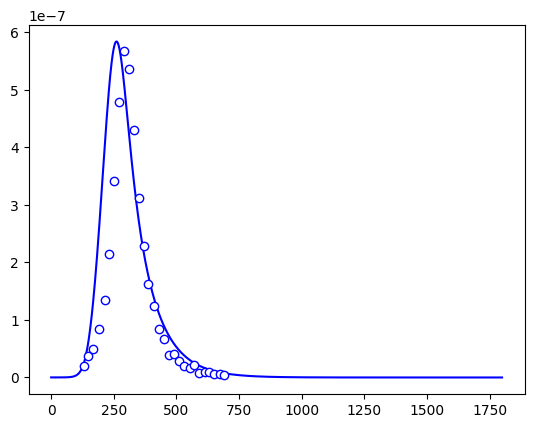

In [2]:
data = sio.loadmat("../../data/data_case_3.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data = np.loadtxt("../../data/exp_data_case_3.dat").T
t_exp = exp_data[0].reshape([-1, 1])
u_exp = exp_data[1].reshape([-1, 1])

plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp, u_exp, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [3]:
np.max(data["Y"], axis=0)

array([1.00000000e+00, 1.00000000e+00, 4.54258697e+00, 5.41050264e-01,
       1.29888545e-01, 1.00000000e+00, 1.00000000e-04, 8.99075842e+00,
       8.99157588e-04, 1.00000000e+00, 6.52850980e-04, 1.69286597e+01,
       2.63365081e+00, 1.00000000e+00, 1.19242711e-02, 1.35988619e+02,
       5.67362069e+01, 1.00000000e+00, 1.00010020e+00, 1.00000000e+00,
       1.00000000e-04, 9.98889639e-01, 9.96740400e-01, 7.49224388e-03,
       1.00000000e+00, 1.07688723e-04, 1.99890385e+00, 1.94999777e+00,
       1.96262243e+00, 1.00000000e+00, 1.00010002e+00, 1.00000000e+00,
       9.95287924e-01, 1.00000000e+00])

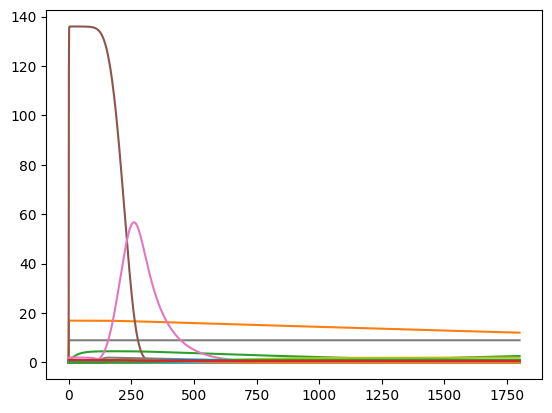

In [4]:
plt.plot(t_test * TIM, u_test)
plt.show()

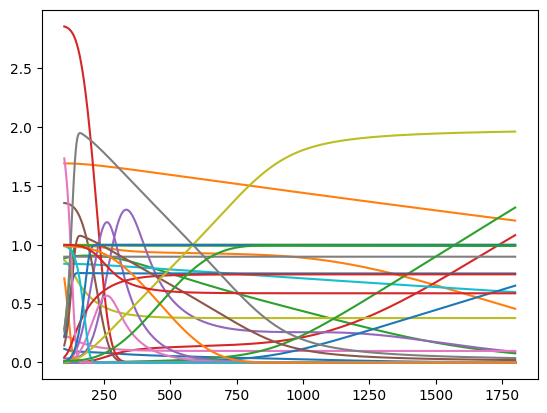

In [5]:
scale = np.array(
    [1, 1, 5, 0.5, 0.1, 1, 0.0000002, 10, 0.001, 0.005, \
     0.001, 10, 2, 0.01, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 1, 1, 1]
).reshape([-1])

u_test = u_test / scale

plt.plot(t_test[100:] * TIM, u_test[100:, :])
plt.show()

In [6]:
np.max(u_test[200:, :], axis=0)

array([8.75883084e-02, 9.91105323e-01, 9.08292047e-01, 1.08210053e+00,
       1.29888545e+00, 1.02684171e-03, 1.42825118e-01, 8.99075838e-01,
       5.50173769e-01, 8.33198516e-01, 6.52850980e-01, 1.68057769e+00,
       1.31682541e+00, 1.87905048e+00, 1.19242711e+00, 8.91785827e-01,
       5.67362069e-01, 1.66307787e-19, 1.00010000e+00, 1.10565860e-10,
       7.58821500e-01, 1.44967602e-06, 9.95009158e-01, 7.49224388e-01,
       1.13102402e-12, 1.04211453e+00, 2.04775731e-08, 1.88703118e+00,
       1.96262243e+00, 4.09845275e-02, 1.00010002e+00, 9.64315408e-01,
       9.95287924e-01, 9.50291844e-01])

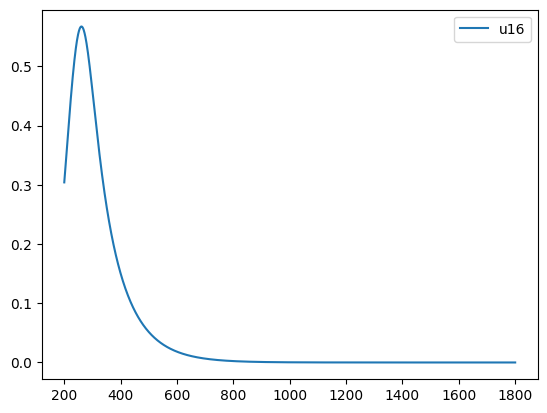

In [7]:
start = 200
# plt.plot(t_test[start:] * TIM, u_test[start:, 4], label='u4')
# plt.plot(t_test[start:] * TIM, u_test[start:, 6], label='u6')
# plt.plot(t_test[start:] * TIM, u_test[start:, 9], label='u9')
# plt.plot(t_test[start:] * TIM, u_test[start:, 10], label='u10')
# plt.plot(t_test[start:] * TIM, u_test[start:, 12], label='u12')
# plt.plot(t_test[start:] * TIM, u_test[start:, 13], label='u13')
# plt.plot(t_test[start:] * TIM, u_test[start:, 14], label='u14')
plt.plot(t_test[start:] * TIM, u_test[start:, 16], label='u16')
# plt.plot(t_test[start:] * TIM, u_test[start:, 18], label='u18')
# plt.plot(t_test[start:] * TIM, u_test[start:, 31], label='u31')
# plt.plot(t_test[start:] * TIM, u_test[start:, 32], label='u32')
# plt.plot(t_test[start:] * TIM, u_test[start:, 33], label='u33')
plt.legend()
plt.show()

In [8]:
# u_test[:, 16] * NDM[16] * scale[16] * 1e-9 = u_exp * scale_exp
# u_test[:, 16] * 10.0 * 100 * 1e-9 = u_exp * scale_exp
# u_test[:, 16] * 1e-6 = u_exp * scale_exp
scale_exp = 1e-6
u_exp = u_exp / scale_exp

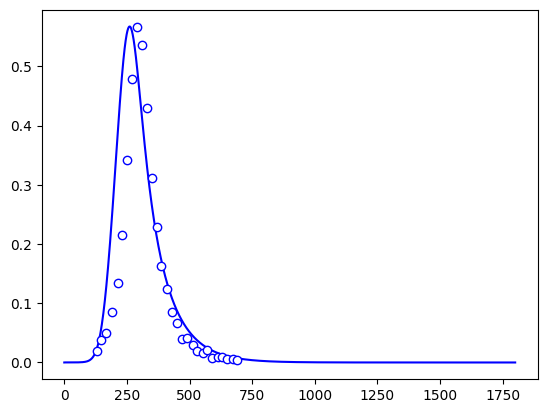

In [9]:
plt.plot(t_test * TIM, u_test[:, 16], 'b', label='Model(No Inh)')
plt.plot(t_exp, u_exp, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [10]:
t_train_model = t_test[200:][::20] # discard first 200 fluctuant points
u_train_model = u_test[200:][::20]
t_train_exp = t_exp / TIM
u_train_exp = u_exp
f_train = np.zeros_like(u_train_model)

model = models.PINN(TIM, NDM, scale, eps=1e-6)

In [11]:
# loss = model.train(t_train, f_train, t_train, u_train, eps=1e-7, niter=400000)
loss = model.train(t_train_model, f_train, t_train_model, u_train_model, t_train_exp, u_train_exp, eps=1e-9, niter=500000)
# print total loss, data loss, ode loss, eq10_loss, eq14_loss, eq31_loss, eq32_loss, eq33_loss

0 47.816498 3.719005 44097495000.0 8581225000.0 194665380000.0 11803.053 11828.785 4409544.0
1000 0.32555228 0.32422197 1330313.9 263498180.0 31592450000.0 464014.3 463996.4 8.374367
2000 0.32588452 0.31906897 6815557.0 40388470.0 29732220000.0 196080.03 196093.25 612.56573
3000 0.22819607 0.22402412 4171959.2 253124220.0 34029777000.0 99648.336 99769.22 362.97128
4000 0.20385668 0.2014415 2415187.0 9363122.0 130611960000.0 57142.668 57142.066 99.46891
5000 0.19430636 0.1919289 2377460.0 20465660.0 185885700000.0 33318.887 33319.156 45.176025
6000 0.16535163 0.16500801 343615.94 8963555.0 25180862000.0 19708.7 19712.416 5.229656
7000 0.12969145 0.12816808 1523379.4 4453664.0 103800140000.0 12106.592 12107.512 46.111923
8000 0.122245595 0.11927817 2967421.0 25059460.0 25379695000.0 7223.5464 7223.442 269.89264
9000 0.112260684 0.11199427 266420.12 27290908.0 18316771000.0 4653.929 4654.3687 7.3671227
10000 0.114448756 0.10919009 5258663.5 81103540.0 20690977000.0 2894.3027 2894.9182 504

86000 0.0001301425 0.000112497364 17645.145 57133.477 1763855500.0 2.2964954 2.3062782 0.00014165188
87000 0.0002772211 0.0002590631 18157.996 1444498.8 1813705200.0 2.4271321 2.4266052 0.00016472611
88000 5.20074e-05 3.4777288e-05 17230.111 183204.06 1722135800.0 2.4882348 2.4850845 0.00019485207
89000 5.2305335e-05 3.5013196e-05 17292.139 25646.334 1728528100.0 2.5032659 2.502387 0.00015949908
90000 0.00059458445 0.0005763718 18212.633 4902688.5 1815588100.0 2.737953 2.7195988 0.0002268433
91000 4.174281e-05 2.4562712e-05 17180.098 19202.656 1717370900.0 2.338233 2.3389742 0.00015189104
92000 7.826218e-05 6.0794075e-05 17468.11 105709.11 1746127200.0 2.214944 2.2251463 0.0001339002
93000 5.0459726e-05 3.327534e-05 17184.387 33132.76 1717725700.0 2.408314 2.4052324 0.00019864798
94000 4.2322412e-05 2.5122563e-05 17199.848 15624.883 1719363200.0 2.2723086 2.270582 0.00015183986
95000 4.122511e-05 2.402765e-05 17197.459 12528.321 1719138600.0 2.2212493 2.221315 0.0001505322
96000 8.6191

168000 0.00012216071 0.000105144136 17016.566 3241686.0 1698066000.0 0.8039247 0.8173981 0.00018675037
169000 0.000107801054 8.993347e-05 17867.582 25986.734 1786387200.0 0.9248316 0.9292583 0.00015974737
170000 9.697873e-05 7.957915e-05 17399.582 207311.19 1739430800.0 0.6348927 0.63369745 0.0001933295
171000 5.1011953e-05 3.371366e-05 17298.295 440659.0 1728811500.0 0.7933634 0.77391917 0.00042056435
172000 3.8799197e-05 2.1582147e-05 17217.049 49586.91 1721463000.0 0.369912 0.367922 0.000118343916
173000 3.82867e-05 2.1091166e-05 17195.535 19101.18 1719341400.0 0.31809694 0.31833935 0.00012930088
174000 3.8790677e-05 2.1620432e-05 17170.248 34153.31 1716796400.0 0.311657 0.31252393 0.00013212537
175000 4.532445e-05 2.8044933e-05 17279.52 120274.87 1727591300.0 0.44218832 0.4415598 0.00015213869
176000 4.0709187e-05 2.3505392e-05 17203.797 14653.3545 1720177700.0 0.24901934 0.24981795 0.00013761135
177000 7.310666e-05 5.579598e-05 17310.682 1654698.6 1728929300.0 1.8200622 1.806106 0

249000 3.8543883e-05 2.1428932e-05 17114.951 10409.945 1711359100.0 0.1317122 0.13153845 9.933738e-05
250000 3.81249e-05 2.096566e-05 17159.242 10136.564 1715777500.0 0.17472015 0.17449604 0.00010151517
251000 0.00027942943 0.00026172295 17706.49 906213.25 1769401300.0 1.1505848 1.1481805 0.000111581496
252000 3.719861e-05 1.9933364e-05 17265.248 14663.572 1726383700.0 0.0961291 0.09570014 0.0001073176
253000 0.00012270184 0.00010547122 17230.613 235856.2 1722664100.0 0.22915652 0.22789639 0.000115651914
254000 3.8668906e-05 2.1433309e-05 17235.598 143982.45 1723291100.0 0.1658013 0.16504823 9.159089e-05
255000 4.0423154e-05 2.3223114e-05 17200.043 35274.785 1719864300.0 0.10590182 0.10498136 8.3499704e-05
256000 3.6752055e-05 1.9546647e-05 17205.408 14375.841 1720407200.0 0.12745495 0.12719908 9.392385e-05
257000 6.139333e-05 4.3787288e-05 17606.045 489382.53 1759966500.0 0.13263135 0.13190538 0.00012220039
258000 3.83701e-05 2.113243e-05 17237.672 15398.366 1723612800.0 0.1863349 0.1

329000 5.916333e-05 4.1860407e-05 17302.922 95754.25 1730079600.0 0.16366479 0.16315737 8.413539e-05
330000 3.762552e-05 2.0369273e-05 17256.246 12083.146 1725499000.0 0.09261351 0.09159979 9.515308e-05
331000 4.7118592e-05 3.0055471e-05 17063.12 173217.8 1706027100.0 0.099899516 0.09918178 9.167179e-05
332000 3.5960446e-05 1.868808e-05 17272.363 8295.122 1727119400.0 0.0834206 0.08231513 9.214811e-05
333000 3.630267e-05 1.9068553e-05 17234.117 14016.274 1723290600.0 0.1346677 0.13413581 8.036003e-05
334000 3.5806705e-05 1.8582614e-05 17224.092 7162.7124 1722297200.0 0.12726378 0.12670848 7.928696e-05
335000 3.5692254e-05 1.846857e-05 17223.686 6525.7856 1722260400.0 0.11120914 0.11048092 7.946066e-05
336000 3.9455488e-05 2.2290902e-05 17164.586 35067.668 1716306700.0 0.14254506 0.14149019 8.8383866e-05
337000 3.6903097e-05 1.9604413e-05 17298.684 8721.789 1729763700.0 0.0964857 0.09574617 7.669948e-05
338000 4.3715045e-05 2.6518097e-05 17196.95 56560.02 1719518200.0 0.16285123 0.16227

409000 3.4910525e-05 1.7681812e-05 17228.713 6606.403 1722764800.0 0.07514503 0.07387098 8.4898165e-05
410000 3.502763e-05 1.779797e-05 17229.662 7998.92 1722857100.0 0.0965831 0.09511152 8.201885e-05
411000 4.1990963e-05 2.468179e-05 17309.174 137004.02 1730665300.0 0.08653552 0.085259475 9.7949865e-05
412000 5.896567e-05 4.1827276e-05 17138.396 223822.3 1713480200.0 0.15958051 0.15839544 0.00010393623
413000 3.927324e-05 2.2033197e-05 17240.045 48369.523 1723830800.0 0.06608782 0.06427536 0.00011254084
414000 3.5496752e-05 1.8314053e-05 17182.7 8745.185 1718166400.0 0.06680965 0.06579606 8.152115e-05
415000 0.00010336703 8.601497e-05 17352.057 47685.832 1735021700.0 0.29885197 0.29885635 7.66494e-05
416000 3.4980076e-05 1.7762055e-05 17218.02 5698.168 1721698400.0 0.06625459 0.06497474 8.481889e-05
417000 4.0310264e-05 2.3160725e-05 17149.54 63181.594 1714783400.0 0.043561872 0.042473197 9.869977e-05
418000 3.743529e-05 2.0178302e-05 17256.986 8415.178 1725592800.0 0.11885895 0.11759

490000 3.681334e-05 1.9576359e-05 17236.98 9488.008 1723597400.0 0.07681203 0.07512025 7.591131e-05
491000 4.0709023e-05 2.342171e-05 17287.314 14212.311 1728623500.0 0.07626874 0.07464822 7.87995e-05
492000 3.7337795e-05 2.0057334e-05 17280.46 18936.668 1727927700.0 0.12164648 0.11970297 7.5419695e-05
493000 3.6475045e-05 1.9282345e-05 17192.703 15142.816 1719162200.0 0.052977864 0.051456816 8.253584e-05
494000 3.4308305e-05 1.7080632e-05 17227.672 16155.455 1722668400.0 0.05634581 0.055462606 7.144286e-05
495000 3.4524644e-05 1.7291088e-05 17233.557 11188.371 1723259400.0 0.05514795 0.054037064 7.422241e-05
496000 4.687869e-05 2.9805517e-05 17073.176 51849.875 1707164400.0 0.055962134 0.05466961 9.0170055e-05
497000 4.1740455e-05 2.4532546e-05 17207.91 27823.436 1720649500.0 0.046232637 0.04477492 0.000104732295
498000 8.308348e-05 6.557179e-05 17511.695 234190.2 1750827800.0 0.16676964 0.164853 7.447066e-05
499000 4.1830775e-05 2.4659048e-05 17171.73 48861.43 1717007200.0 0.06281557

In [12]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

In [13]:
# plt.plot(t_test * TIM, (u_pred[:, 14] * NDM[14] * scale[14] + u_pred[:, 16] * NDM[16] * scale[16]) * 1e-9, '--', label='Model(No Inh)')
# plt.plot(t_train * TIM, (u_train[:, 14] * NDM[14] * scale[14] + u_train[:, 16] * NDM[16] * scale[16]) * 1e-9, label='Model(No Inh)')
# plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
# plt.show()

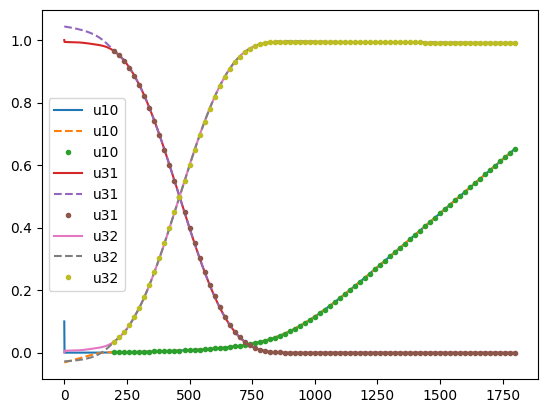

In [14]:
plt.plot(t_test * TIM, u_test[:, 10], label='u10')
plt.plot(t_test * TIM, u_pred[:, 10], '--', label='u10')
plt.plot(t_train_model * TIM, u_train_model[:, 10], '.', label='u10')
# plt.plot(t_test * TIM, u_test[:, 18], label='u18')
# plt.plot(t_test * TIM, u_pred[:, 18], '--', label='u18')
# plt.plot(t_train * TIM, u_train[:, 18], '.', label='u18')
plt.plot(t_test * TIM, u_test[:, 31], label='u31')
plt.plot(t_test * TIM, u_pred[:, 31], '--', label='u31')
plt.plot(t_train_model * TIM, u_train_model[:, 31], '.', label='u31')
plt.plot(t_test * TIM, u_test[:, 32], label='u32')
plt.plot(t_test * TIM, u_pred[:, 32], '--', label='u32')
plt.plot(t_train_model * TIM, u_train_model[:, 32], '.', label='u32')
plt.legend()
plt.show()

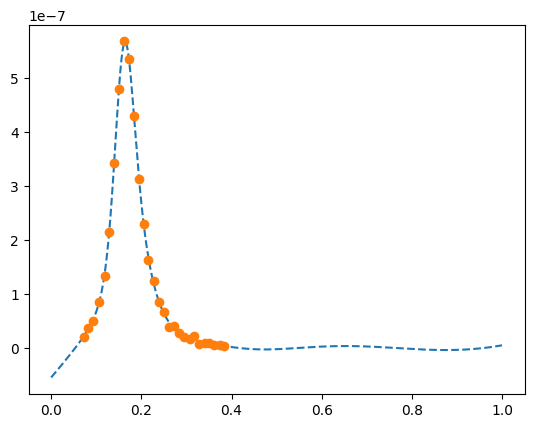

In [18]:
j = 16
plt.plot(t_test, u_pred[:, j] * NDM[j] * scale[j] * 1e-9, '--')
# plt.plot(t_train_model, u_train_model[:, j] * NDM[j] * scale[j] * 1e-9, ".")
plt.plot(t_train_exp, u_train_exp * scale_exp, "o")
plt.show()

In [16]:
# plt.plot(t_test * TIM, u_pred[:, 16] * NDM[16] * scale[16] * 1e-9, '--')
# plt.plot(t_train * TIM, u_train[:, 16] * NDM[16] * scale[16] * 1e-9)
# plt.show()

In [16]:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", tf.math.exp(model.log_h_10_TPplus).numpy())
print("h_10_TPminus:",  tf.math.exp(model.log_h_10_TPminus).numpy())
print("h_2:", tf.math.exp(model.log_h_2).numpy())

h_10_TPplus: 4.0912995
h_10_TPminus: 8.180822e-05
h_2: 0.0001781236
